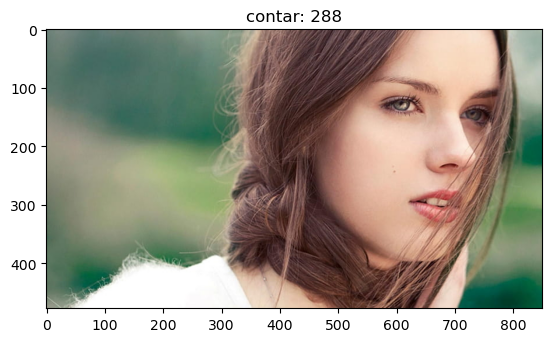

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def contar(img):
    img_gris= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binaria=cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    borde, _=cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)
    return cont

image=cv2.imread('girl.jpg')

img_cont=contar(image)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.title(f'contar: {img_cont}')
plt.show()

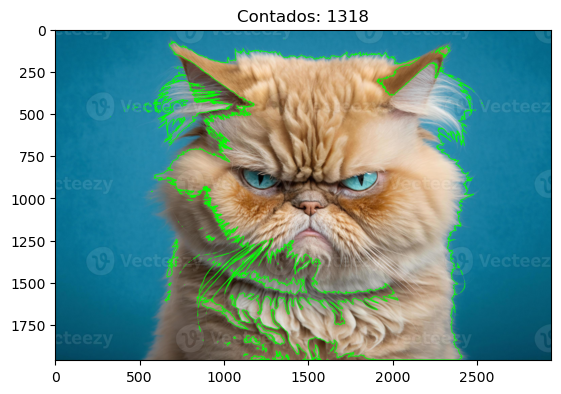

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contarAndBordes(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    borde, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_contornada = cv2.drawContours(img.copy(), borde, -1, (0, 255, 0), 3)
    cont = len(borde)
    return cont, img_contornada

image = cv2.imread('cat.jpg')

img_cont, img_contornada = contarAndBordes(image)

plt.imshow(cv2.cvtColor(img_contornada, cv2.COLOR_BGR2RGB))
plt.title(f'Contados: {img_cont}')
plt.show()


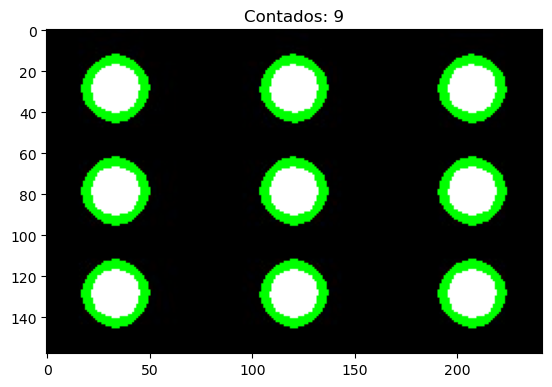

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar_y_dibujar_bordes(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    borde, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_contornada = img.copy()
    cv2.drawContours(img_contornada, borde, -1, (255, 255, 255), thickness=cv2.FILLED)  # Rellenar los contornos en blanco
    cv2.drawContours(img_contornada, borde, -1, (0, 255, 0), 3)  # Dibujar los bordes en verde
    cont = len(borde)
    return cont, img_contornada

image = cv2.imread('conteo.jpeg')

img_cont, img_contornada = contar_y_dibujar_bordes(image)

plt.imshow(cv2.cvtColor(img_contornada, cv2.COLOR_BGR2RGB))
plt.title(f'Contados: {img_cont}')
plt.show()


conectividad 

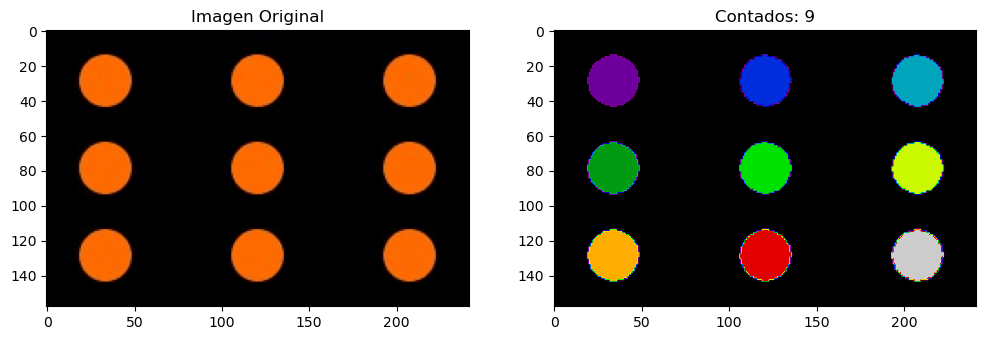

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as ms

def contar(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    etiquetar = ms.label(binaria, connectivity=2)
    cont = np.max(etiquetar)
    return cont, etiquetar

image = cv2.imread('conteo.jpeg')
img_cont, etiquetar = contar(image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(etiquetar, cmap='nipy_spectral')
plt.title(f'Contados: {img_cont}')

plt.show()
